# Лабораторная работа № 7. Определение критически важных элементов модельной РЛС.

В работе предлагается провести свободный анализ функционирования модельной РЛС и выявить критически важные элементы, влияющие больше всего на излучаемую мощность РЛС.

## Описание данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('Lab7_data.csv')
df.head(10)

Timestamp  Regime  Power1  Power2  Power3  Power4  Power5  Power6  Power7  \
0          0       3    0.00  355.82  410.17  402.41  330.94    0.00  368.30   
1          1       3    0.00  376.54  377.97  361.09  346.02    0.00  367.39   
2          2       2    0.00  345.88  396.03  354.06  347.23    0.00  380.34   
3          3       3    0.00  336.71  382.53  395.38  304.73    0.00  384.53   
4          4       1    0.00  369.41  382.03  376.33  339.97    0.00  391.72   
5          5       1  399.14  368.74  374.59  381.38  337.10  403.18  390.04   
6          6       2  389.19  347.01  371.73  378.46  361.27  421.35  397.41   
7          7       1  398.22  368.20  380.41  375.96  341.58  401.90  392.47   
8          8       1  401.61  365.20  377.56  381.00  338.20  401.57  387.41   
9          9       1  403.38  366.16  378.18  375.34  336.70  402.41  391.80   

   Power8  ...  State10  State11  State12  State13  State14  State15  State16  \
0    0.00  ...        1        1        0        0        0        1        1   
1    0.00  ...        1        1        0        0        0        1        1   
2    0.00  ...        1        1        0        0        0        0        1   
3    0.00  ...        1        1        0        0        0        1        1   
4    0.00  ...        1        1        0        0        0        1        1   
5  401.64  ...        1        1        1        1        1        1        1   
6  424.92  ...        1        1        1        1        1        1        0   
7  404.28  ...        1        1        1        1        1        1        1   
8  400.09  ...        1        1        1        1        1        1        1   
9  397.14  ...        1        1        1        1        1        1        1   

   Sum_power  State_float  State  
0    3609.67         0.68      0  
1    3599.12         0.68      0  
2    3319.82         0.58      0  
3    3637.85         0.67      0  
4    3662.08         0.73      0  
5    6053.87         0.90      1  
6    5861.74         0.77      0  
7    6054.25         0.90      1  
8    6062.08         0.91      1  
9    6046.19         0.90      1  

[10 rows x 37 columns]

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 37 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Timestamp    10000 non-null  int64  
 1   Regime       10000 non-null  int64  
 2   Power1       10000 non-null  float64
 3   Power2       10000 non-null  float64
 4   Power3       10000 non-null  float64
 5   Power4       10000 non-null  float64
 6   Power5       10000 non-null  float64
 7   Power6       10000 non-null  float64
 8   Power7       10000 non-null  float64
 9   Power8       10000 non-null  float64
 10  Power9       10000 non-null  float64
 11  Power10      10000 non-null  float64
 12  Power11      10000 non-null  float64
 13  Power12      10000 non-null  float64
 14  Power13      10000 non-null  float64
 15  Power14      10000 non-null  float64
 16  Power15      10000 non-null  float64
 17  Power16      10000 non-null  float64
 18  State1       10000 non-null  int64  
 19  State

Файл с данными предствляет собой запись мощности, излучаемой модельной РЛС, состоящей из 16 блоков усиления мощности (БУМ). Динамика мощности отражает реальные процессы и взаимосвязи, происходящие на РЛС.

Первый столбец обозначает временной отсчет, второй столбец - режим работы РЛС, который напрямую определяет выходную мощность БУМ и сказывается на внутренних процессах деградации БУМ. Далее в 16 столбцах записаны мощности выходного сигнала БУМ, а также состояния каждого из блоков усиления мощности, которое показывает, дает ли этот блок вклад в излучаемую мощность РЛС. Следом представлена суммарная мощность, излучаемая РЛС, а также состояние РЛС в виде вещественного числа, которое показывает, насколько излучаемая мощность соответствует максимально возможной при данном режиме работы РЛС. Последний столбец - информация о состоянии РЛС в виде бинарной величины.

Каждый БУМ характеризуется своим состоянием, который показывает, насколько выдаваемая мощность соответствует максимально возможной для этого БУМ. Снижение работоспособности БУМ (снижение его состояния) связано исключительно с работой самого БУМ: чем дольше и напряженнее он работает, тем быстрее снижается его состояние. Кроме того, блоки немного отличаются друг от друга, т.е. каждый из них снижает свою рабоспособность немного с разной скоростью.

В каждом из режимов работы есть диапазон возможных излучаемых мощностей. В самом простом режиме работы (зондирование местности) изменение состояния БУМ не происходит. В самом напряженном режиме работы (сопровождение одновременно нескольких целей) уменьшение состояния БУМ происходит быстрее всего.

При снижении выдаваемой мощности ниже определенной отметки, оператор принимает решение о замене текущего БУМ новым, и блок перестает работать - его выходная мощность равна 0. Если таких блоков накопится несколько, то они заменяеются на абсолютно новые, состояние которых равно 1.

Иногда мощность блоков независимо от действующего режима опускается ниже 300 Вт (случайное резкое снижение мощности) на 1 отсчет. После этого блоки продолжают работать также, как и ранее.

Каждый БУМ имеет свой вклад в суммарную мощность РЛС. Суммарная излучаемая мощность РЛС равна сумме выдаваемой мощности каждого БУМ, умноженного на коэффициент влияния БУМ (вещественное число от 0 до 1). Под отказом РЛС (значение 0 в последнем столбце) понимается снижение суммарной мощности на 10 % от максимально возможной при заданном режиме работы.

## Задания

### 1. Определите диапазон выходных мощностей БУМ для каждого из режимов работы. Определите среднюю мощность и стандартное отклонение. Изобразите эту информацию визуально.

Regime - 0 Block - 0 
min:332.0192
max:404.44
std:20.394775861369286
Regime - 1 Block - 0 
min:330.9716
max:425.83
std:22.57872130469184
Regime - 2 Block - 0 
min:320.4024
max:439.49
std:26.792769047131447
Regime - 0 Block - 1 
min:331.7348
max:404.29
std:20.71589286288612
Regime - 1 Block - 1 
min:328.9448
max:426.68
std:22.99335191079371
Regime - 2 Block - 1 
min:325.8988
max:437.05
std:26.746021482703743
Regime - 0 Block - 2 
min:323.9136
max:404.68
std:21.119887212752293
Regime - 1 Block - 2 
min:322.3852
max:424.13
std:23.32147156534146
Regime - 2 Block - 2 
min:313.71020000000004
max:439.12
std:27.072548414078792
Regime - 0 Block - 3 
min:328.6646
max:404.99
std:20.72590083435465
Regime - 1 Block - 3 
min:323.5511
max:426.52
std:23.52787750003309
Regime - 2 Block - 3 
min:313.30850000000004
max:439.54
std:28.063243126229548
Regime - 0 Block - 4 
min:335.35679999999996
max:403.12
std:19.19281504544396
Regime - 1 Block - 4 
min:333.97
max:426.51
std:21.905340763040424
Regime - 2 Bl

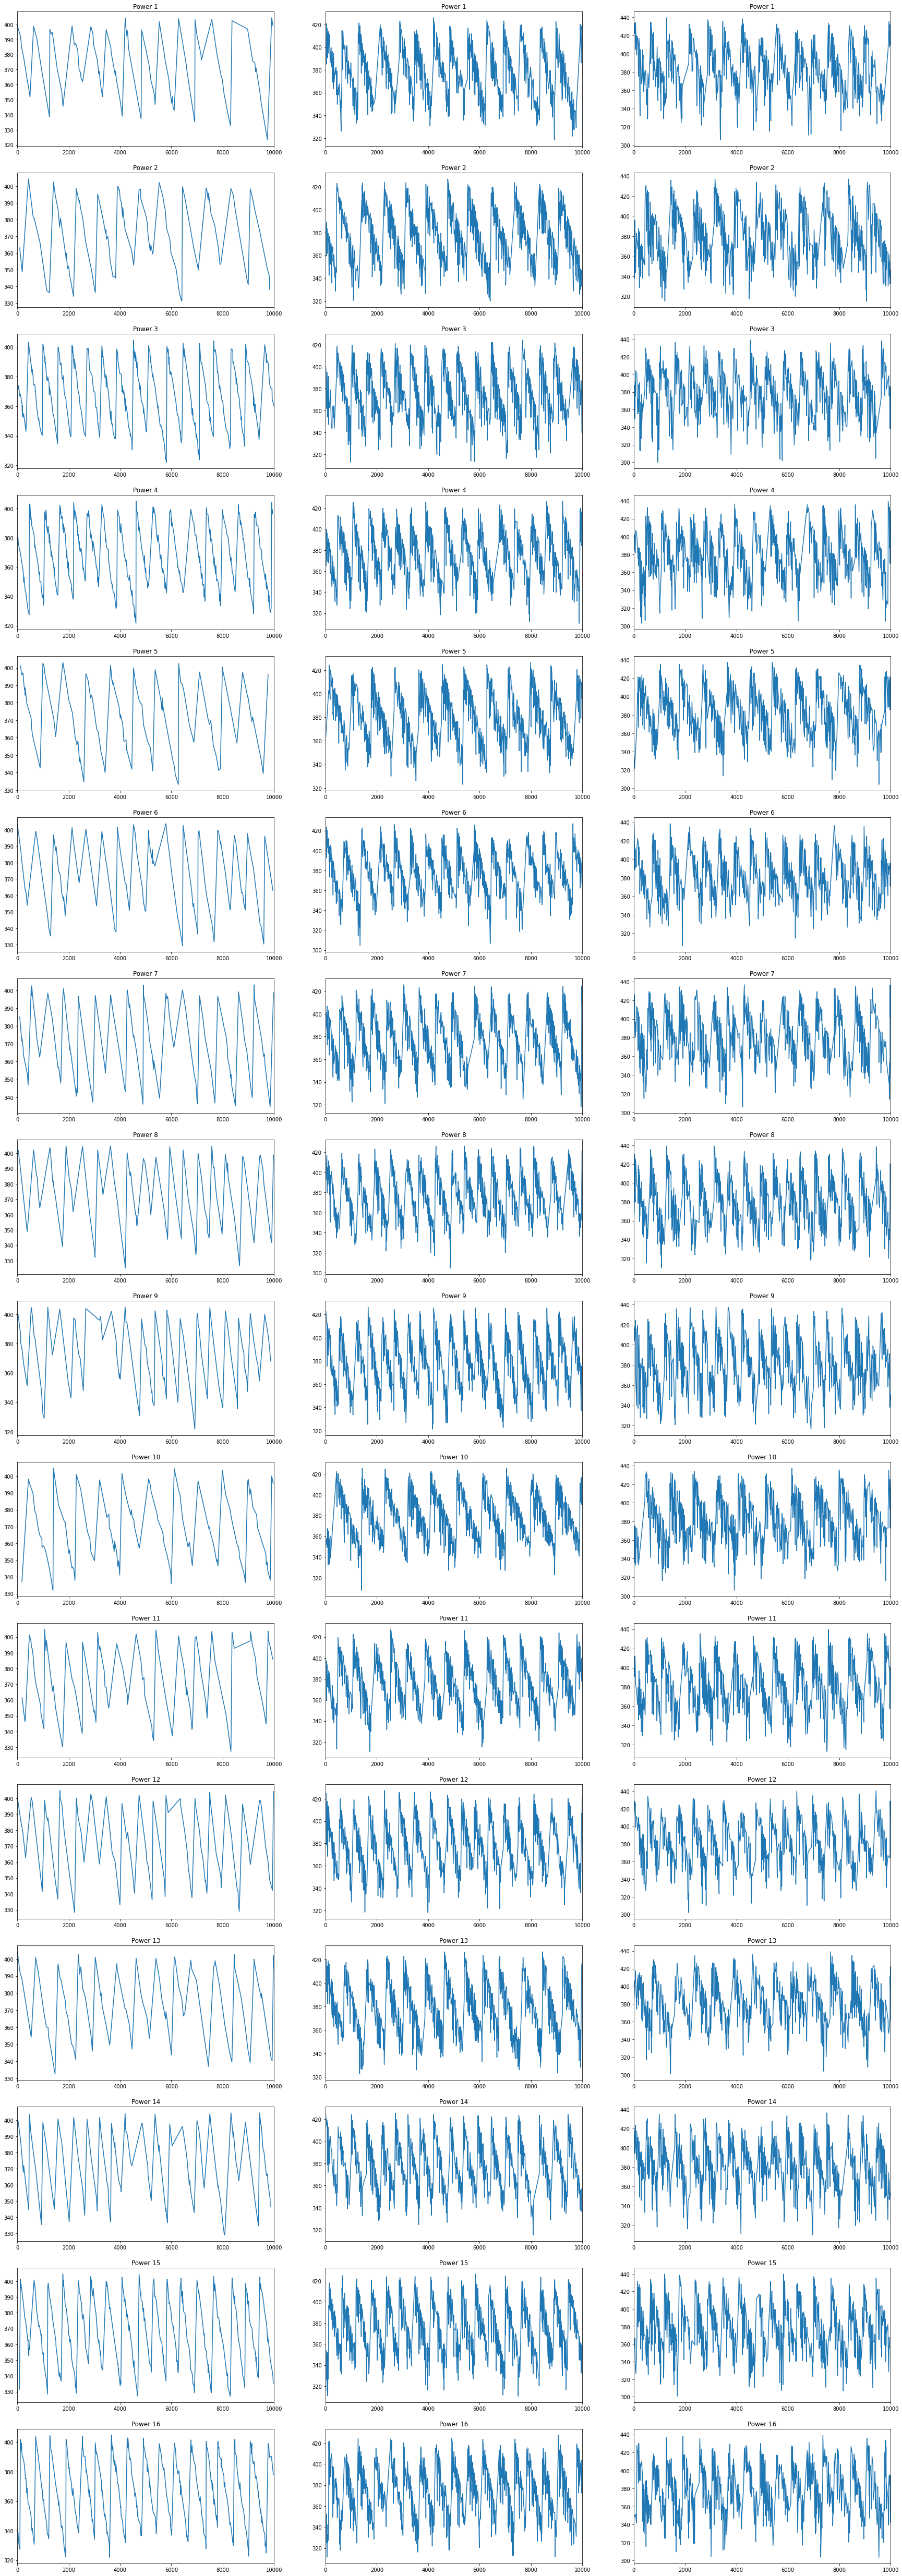

In [3]:
plt.figure(figsize=(30,90))
for i in range(16):
    for j in range(3):
        plt.subplot(16,3,i*3 + j +1)
        block = df[df["Regime"]==j+1]['Power'+str(i+1)]
        block = block[block.diff(1) > 12]
        block = block[block > 300]
        plt.plot(block)

        min = block.quantile(0.01)
        max = np.max(block)
        std = np.std(block)

        print(f"Regime - {j} Block - {i} \nmin:{min}\nmax:{max}\nstd:{std}")

        plt.xlim(0,10000)
        plt.title('Power '+str(i+1))
plt.show()

### 2. Определите для каждого БУМ его подверженность деградации при работе по назначению. Изобразите эту информацию визуально.

In [6]:
from scipy.signal import find_peaks

import plotly.express as px


NameError: name 'statsmodels' is not defined

AssertionError: 

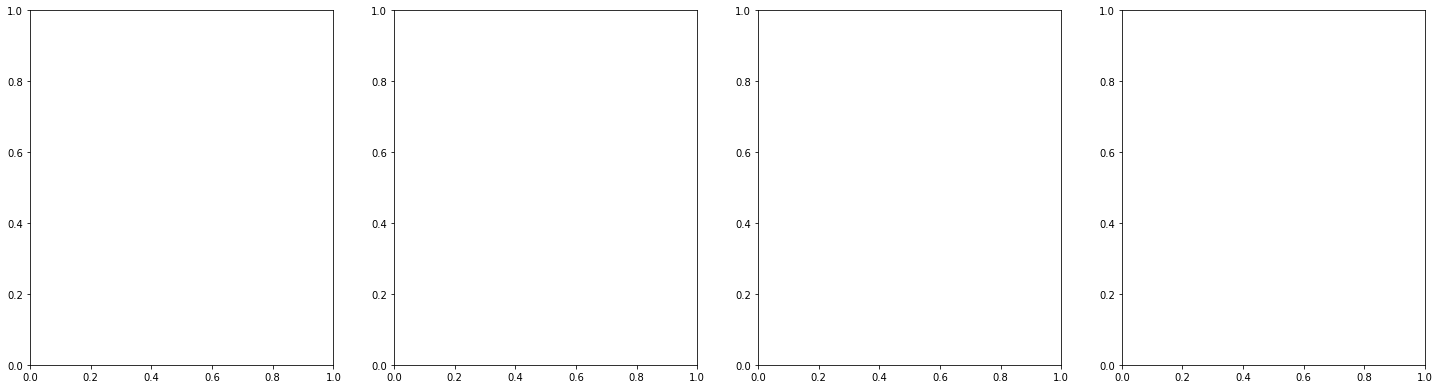

In [15]:
plt.figure(figsize=(25,30))
for i in range(16):
    plt.subplot(4,4,i+1)
    blocks = df['Power'+str(i+1)]

    fig = px.scatter(blocks, trendline="lowess", trendline_options=dict(frac=0.005))
    fig.show()

    if i == 3:
        assert(0)
plt.show()

### 3. Определите вклад каждого БУМ в излучаемую мощность РЛС. Изобразите эту информацию визуально. Выделите критически важные элементы - блоки, которые в большей степени влияют на излучаемую мощность РЛС.

### 4. Определите, каково среднее время жизни каждого БУМ. Изобразите эту информацию визуально.

### 5. Сделайте выводы.